In [1]:
import numpy as np
import os
import glob
from collections import OrderedDict
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt
from astropy import table

#For running specutils
import specutils
from specutils.analysis import Splice
from astropy import units as u
from astropy.nddata import StdDevUncertainty

matplotlib.rcParams['image.origin'] = 'lower'

# Read in iraf output

In [2]:
tab_iraf = table.Table.read('/Users/ogaz/specutils/test_data/iraf_splice_set.fits')
flux_iraf = tab_iraf['FLUX'].data.data
wave_iraf = tab_iraf['WAVELENGTH'].data.data

# Run Specutils

In [3]:
filenames=[ '/Users/ogaz/specutils/test_data/ocr7ncmhq_uniform.fits',
           '/Users/ogaz/specutils/test_data/ocr7ncmiq_uniform.fits']
spectra_even = []
spectra = []

for filename in filenames:
    tab = table.Table.read(filename)
    spectra.append(specutils.Spectrum1D(flux=tab['FLUX'].data.data.flatten(), 
                spectral_axis=tab['WAVELENGTH'].data.data.flatten(),
                uncertainty=StdDevUncertainty(tab['ERROR'].data.data.flatten())))
    
splicei = Splice(spacing='coarse')
spectra_python=splicei(spectra)

INFO:root:Increasing bin width to 4.879917205259423 Angstrom.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.
INFO:root:Re-sampling: original and final grids are uniform.


# Comparison Plots

In [9]:
flux_diff = (flux_iraf[0][:] - spectra_python.flux.value) / np.average(flux_iraf[0][:])

In [6]:
print("flux iraf: len - {}\n{}\n".format(len(flux_iraf[0]), flux_iraf))
print("wave iraf: len - {}\n{}\n".format(len(wave_iraf[0]), wave_iraf))
print("flux python: len - {}\n{}\n".format(len(spectra_python.flux), spectra_python.flux))
print("wave python: len - {}\n{}\n".format(len(spectra_python.spectral_axis), spectra_python.spectral_axis))

flux iraf: len - 1023
[[2.4575144e-11 1.8615564e-11 1.9141397e-11 ... 1.0344260e-11
  9.4411345e-12 9.0129371e-12]]

wave iraf: len - 1023
[[ 5269.42588739  5274.30580459  5279.1857218  ... 10246.94143675
  10251.82135396 10256.70127116]]

flux python: len - 1023
[2.46444176e-11 1.81519244e-11 1.92140999e-11 ... 1.02754398e-11
 9.38019324e-12 8.98438962e-12] 1 / Angstrom2

wave python: len - 1023
[ 5269.42588739  5274.30580459  5279.1857218  ... 10246.94143675
 10251.82135396 10256.70127116] Angstrom



<IPython.core.display.Javascript object>


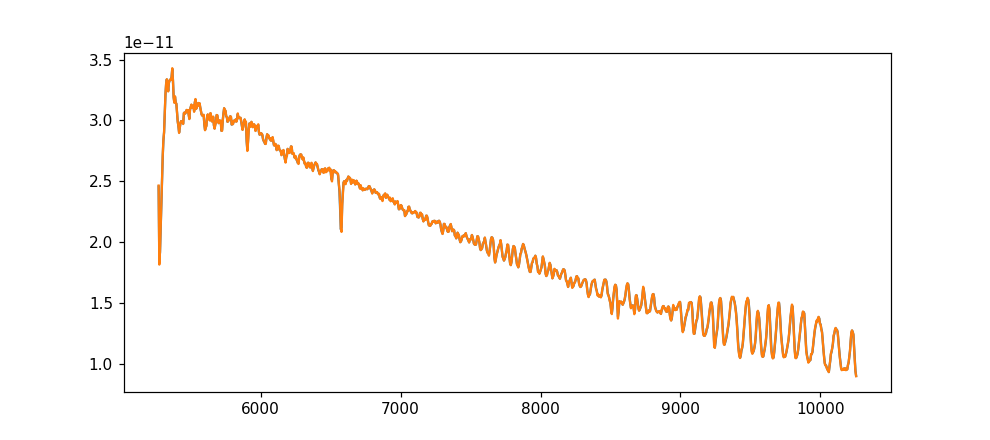

In [7]:
fig, axes = plt.subplots()
fig.set_size_inches(9, 4)
#axes.set_xlim(5000,7000)
axes.plot(wave_iraf[0],flux_iraf[0])
axes.plot(spectra_python.spectral_axis, spectra_python.flux)

Avg:-1.3748243150659061e-05 Min:-0.015297939296108544, Max:0.02323939032733322


<IPython.core.display.Javascript object>


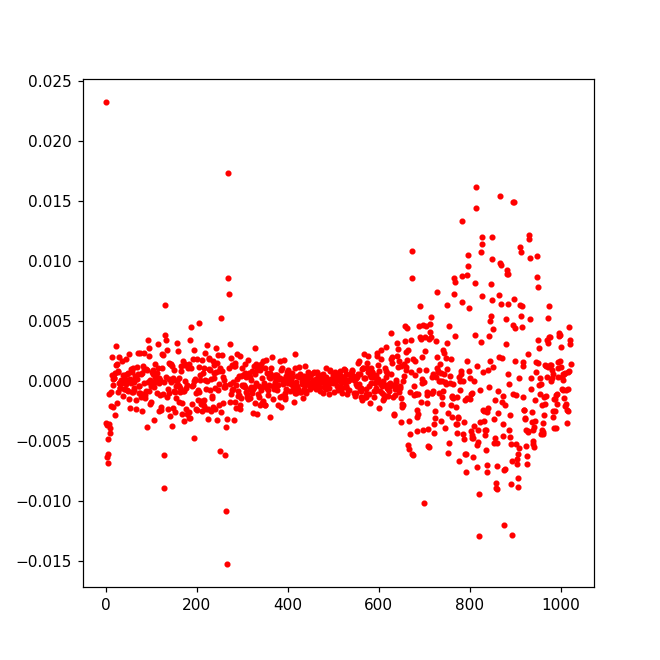

In [10]:
print("Avg:{} Min:{}, Max:{}".format(np.average(flux_diff), min(flux_diff), max(flux_diff)))

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.plot(flux_diff.flatten(), 'r.')

plt.show()